#  Hypothesis Testing with Insurance Data

### Import US Health Insurance Dataset from Kaggle


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os, time,json
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use(['seaborn-muted','fivethirtyeight'])
sns.set_context('talk')

In [3]:
pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
# example making new folder with os
os.makedirs('Data/',exist_ok=True) # Confirm folder created
os.listdir("Data/")

[]

In [5]:
#Import dataset
file_url = r"C:\Users\admin\Documents\GitHub\Hypothesis-Testing-with-Insurance-Data\Data\insurance - insurance.csv"

df = pd.read_csv(file_url)

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Question 1: Do smokers have higher insurance charges than non-smokers?
    
1. State your Null Hypothesis and Alternative Hypothesis   
    - Null Hypothesis:  THe average insurance charge for smokers is equal to the charges for non-smokers.
    - Alt Hypothesis:  The average insurance charge for smokers is higher than those for non-smokers.
        
2. Select the correct test according to the data type and number of samples.

    - We will use a two-sample T-Test to compare the average charges of two independent groups.

3. Test the assumptions of your selected test.

    - Before performing the hypothesis testing we will check for outliers, distribution normality, and equal variance. 


In [19]:
# Find mean

# Define groups
smoker_charge = df.loc[ df['smoker']=='yes',"charges"]
nonsmoker_charge = df.loc[ df['smoker']=='no',"charges"]

# Print mean charge for each group
print(f"The average charges for smokers is {np.mean(smoker_charge)}.")
print(f"The average charges for non-smokers is {np.mean(nonsmoker_charge)}.")

The average charges for smokers is 32050.23183153284.
The average charges for non-smokers is 8434.268297856204.


In [21]:
# Test for outliers

zscores_s = stats.zscore(smoker_charge)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

There are no outliers within the smoking group set

In [22]:
#test for outliers

zscores_n = stats.zscore(nonsmoker_charge)
outliers_n = abs(zscores_n)>3
np.sum(outliers_n)

24

There are 24 outliers within the non-smoking group set

In [24]:
#Removing outliers 
nonsmoker_charge = nonsmoker_charge[(np.abs(stats.zscore(nonsmoker_charge)) < 3)]

In [30]:
# Test for normality

norm_smokers = stats.normaltest(smoker_charge)
norm_nonsmokers = stats.normaltest(nonsmoker_charge)


print(norm_smokers)
print(norm_nonsmokers)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
NormaltestResult(statistic=70.72942109230829, pvalue=4.378258058526592e-16)


p values for both groups are less than 0.05.

In [31]:
# Test for variance

variance = stats.levene(smoker_charge, nonsmoker_charge)
variance

LeveneResult(statistic=672.9614970899742, pvalue=8.519436906838144e-120)

The variance is not equal.

4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [32]:
# T-Test

ttest = stats.ttest_ind(smoker_charge, nonsmoker_charge, equal_var = False)
ttest

Ttest_indResult(statistic=34.32521687276006, pvalue=3.183690185070226e-105)

5. Interpret your p-value and reject or fail to reject your null hypothesis

- The p value is less than 0.05 so we reject the null hypothesis.  There is a difference in charges for smokers and non-smokers.

6. Show a supporting visualization that helps display the result

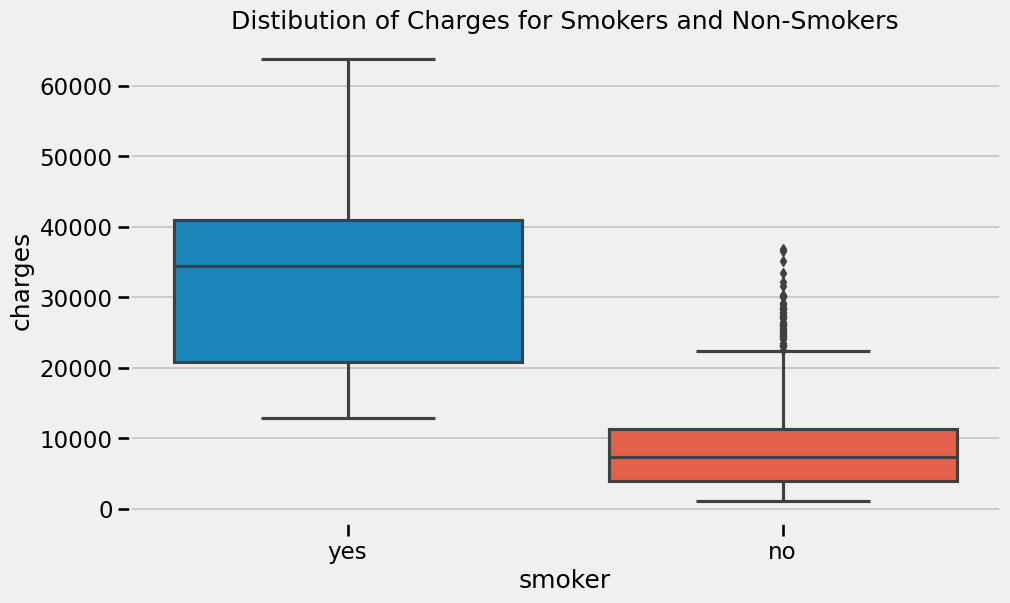

In [34]:
# Create Figure

#Creating boxplot using seaborn to display the result
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distibution of Charges for Smokers and Non-Smokers')
plt.show()

- We can see from the figure above that Smokers have a much higher average charge and a much wider distribution than those charges in non-smoking groups.
- Smoking status has a significant effect on insurance charges.

Question 2: Are men more likely to smoke than women?
    
1. State your Null Hypothesis and Alternative Hypothesis   
    - Null Hypothesis: Both men and women are equally likely to be smokers.
    - Alt Hypothesis:  Men and women are not equally likely to be smokers.
        
2. Select the correct test according to the data type and number of samples.

    - We will use Chi-Square testing to test a hypothesis for categorical variables: sex and smoking status.

3. Test the assumptions of your selected test. 


In [36]:
# Contingency table 

chi_table = pd.crosstab(df['sex'], df['smoker'])
chi_table

smoker,no,yes
sex,,
female,547,115
male,517,159


4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [37]:
# Run Chi-Test

chi_test = stats.chi2_contingency(chi_table)
chi2, p, deg_free, expected_vals = chi_test

In [38]:
# Print p value

print(p)
p<0.5

0.006548143503580696


True

5. Interpret your p-value and reject or fail to reject your null hypothesis

- P value is less than 0.5 so we reject our null hypothesis.
- Male and females are likely to smoke at differing rates.

6. Show a supporting visualization that helps display the result

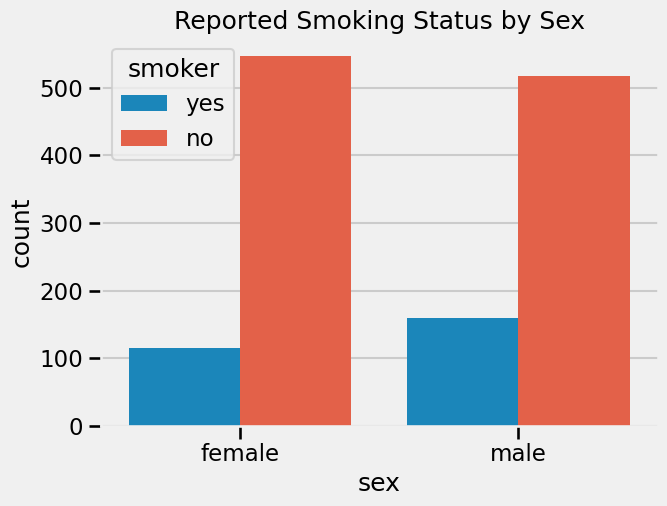

In [41]:
# Plot Figure

sns.countplot(data=df, x='sex', hue='smoker')
plt.title("Reported Smoking Status by Sex"); 

- Females are less likely to be smokers than males.

Question 3: DO different regions have different charges, on average?
    
1. State your Null Hypothesis and Alternative Hypothesis   
    - Null Hypothesis: The average charges are the same for all four regions.
    - Alt Hypothesis:  The average charges are not the same in all four regions.
        
2. Select the correct test according to the data type and number of samples.

    - We will use ANOVA testing to compare a continuous variable across more than two groups.

3. Test the assumptions of your selected test. 


In [42]:
# Test for outliers

zscores = np.abs(stats.zscore(df['charges']))
df = df[zscores < 3]

In [43]:
# Test for normality


# Group by region 
groups = {}

for i in df['region'].unique():
    
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [44]:
# Checking sig 

norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,323.0,1.718876e-22,100.230402
southeast,362.0,1.936990e-13,58.544942
northwest,323.0,9.182483e-21,92.273979
northeast,323.0,6.205365e-18,79.242235


In [45]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test stat,sig
southwest,323.0,1.718876e-22,100.230402,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,323.0,9.182483e-21,92.273979,True
northeast,323.0,6.205365e-18,79.242235,True


In [46]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.894904759083203, pvalue=0.0005382763869610836)

- p values are less than 0.05 so we reject our null hypothesis
- charges are not equal across the four regions

4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

Assumptions were not met above so we will test with Kruskal-Wallis.


In [47]:
# Alternative test: kruskal-wallis


from scipy.stats import kruskal

stat, p = kruskal(df['charges'][df['region'] == 'southwest'],
                  df['charges'][df['region'] == 'southeast'],
                  df['charges'][df['region'] == 'northwest'],
                  df['charges'][df['region'] == 'northeast'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=5.119, p=0.163


5. Interpret your p-value and reject or fail to reject your null hypothesis

-    results from Kruskal-Wallis test have a p value greater than 0.05, so we fail to reject the null hypothesis.  
    - There is no significant difference in charges across the four regions.

6. Show a supporting visualization that helps display the result

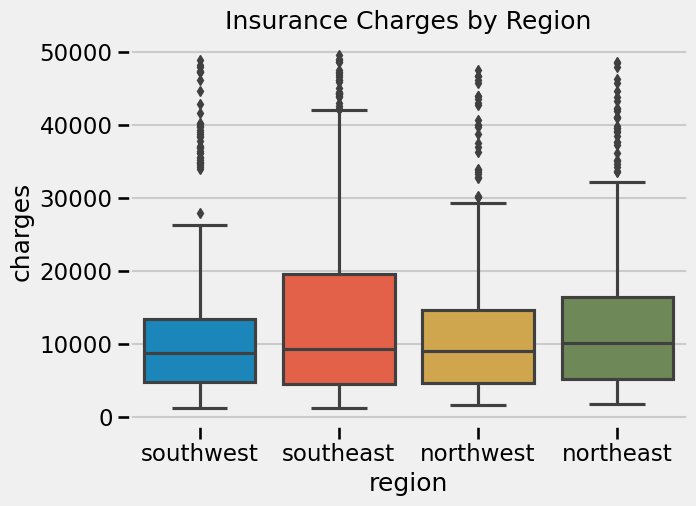

In [48]:
# Plot charges by region 

sns.boxplot(x='region', y='charges', data=df)
plt.title('Insurance Charges by Region')
plt.show()